<a href="https://colab.research.google.com/github/Ansi4Ansi/Google_colab/blob/main/ML_B2C_2024_Q2_%7C_HW08_ML_generative_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #8: Генеративный ИИ

**Оформление ДЗ**:

- Выполненное ДЗ сохраните в файл ``ml_b2c2024q2_<Surname>_<Name>_HW#.ipynb``
  
  (пример ``ml_b2c2024q2__Dral_Alexey_HW01.ipynb``)
- Зарегистрироваться и залогиниться в сервисе [Everest](https://everest.distcomp.org/)
- Перейти на страницу приложения: [BDT-grader-ML-B2C](https://everest.distcomp.org/apps/BigDataTeam/BDT-grader-ML-B2C)
- Выбрать вкладку Submit Job (если отображается иная).
- Выбрать в качестве “Task” значение: `` ML_generative_ai`` (кодовое название для преподвателей: `` ML_generative_ai``)
- Загрузить в качестве “Task solution” файл с решением
- В качестве Access Token указать тот, который был выслан по почте или в телеграм от аккаунта @bdt_manager

**Дополнительные ссылки**
- Настройка локального окружения: https://github.com/big-data-team/ml-course
- Датасеты UCI: https://archive.ics.uci.edu/

**Вопросы**:
- Свои вопросы присылайте в Телеграм.

**Фидбек**:
- Пожалуйста, оставьте свой отзыв после выполнения домашнего задания по сссылке:

    https://forms.gle/iY5NRn9UfaZ344rbA

## Вопросы на понимание (10%)

1. Почему в автоэнкодерах не обязательно использование валидационной выборки?
2. Что произойдет с вариативным автоэнкодером, если убрать регуляризацию через KL-дивергенцию?
3. Допустим что при тренировке GAN модели, генератор обучается быстрее дискриминатора. Что произойдет с моделью?
4. Как выглядят процесс обучения и процесс генерации в диффузионных моделях?
5. Как считается мера ошибки при обучении CLIP?

## Конволюционные автоэнкодеры (20%)

Напишите вариант автоэнкодера для датасета MNIST, который будет использовать сверточные слои.

Для декодера вам пригодится слой `Conv2DTranspose`, который выполняет обратную операцию свертки.


Как вы оцените качество компрессии этой модели по сравнению с обычным полносвязным автоэнкодером? Какую модель Вы бы использовали для задачи сжатия изображений? Почему?

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch import nn
import torch.nn.functional as F

In [ ]:
def get_dataloaders(batch_size: int = 128, num_workers=0):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    trainset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    testset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
    val_size = int(0.2 * len(trainset))
    train_size = len(trainset) - val_size
    trainset, valset = torch.utils.data.random_split(trainset, [train_size, val_size])
    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True
    )
    valloader = torch.utils.data.DataLoader(
        valset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True
    )
    return trainloader, valloader, testloader


# plot the images
trainloader, valloader, testloader = get_dataloaders()
images, labels = next(iter(trainloader))
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
def __init__(self, hidden_dim: int = 2, image_size: int = 28):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
            nn.MaxPool2d(kernel_size = 2, stride = 2)
            
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
            nn.MaxPool2d(kernel_size = 2, stride = 2)
            
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
            nn.MaxPool2d(kernel_size = 2, stride = 2)
         
            nn.flatten(1, -1)
            nn.Linear(image_size * image_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, hidden_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, image_size * image_size),
            nn.view(-1, 1, 28, 28)
            nn.ConvTranspose2d(4, 16, 2, stride=2)
            nn.ConvTranspose2d(16, 1, 2, stride=2)

            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(-1, 1, 28, 28)
        return decoded

## Вариативные автоэнкодеры (35%)

![img](https://www.researchgate.net/publication/365190062/figure/fig2/AS:11431281095388874@1667878234857/Structure-of-the-conditional-variational-autoencoder-CVAE.png)

Воспользуйтесь кодом из семинара (либо конволюционными автоэнкодером из прошого задания) и добавьте условия на вариативные автоэнкодеры.

1. В качестве условия используйте метки классов.
2. В энкодер и декодер добавьте условия на метки классов.


Проверьте качество модели и сравните с обычным вариативным автоэнкодером.

In [ ]:
class VariationalAutoEncoder(nn.Module):
    def __init__(self, hidden_dim: int = 2):
        super().__init__()
        self.hidden_dim = hidden_dim
        # encoder part
        self.encode1 = nn.Linear(28 * 28, 512)
        self.encode2 = nn.Linear(512, 256)
        self.encode_mu = nn.Linear(256, hidden_dim)
        self.encode_logvar = nn.Linear(256, hidden_dim)
        # decoder part
        self.decode1 = nn.Linear(hidden_dim, 256)
        self.decode2 = nn.Linear(256, 512)
        self.decode3 = nn.Linear(512, 28 * 28)

    def encoder(self, x):
        h = F.relu(self.encode1(x))
        h = F.relu(self.encode2(h))
        return self.encode_mu(h), self.encode_logvar(h)

    def sampling(self, mu, log_var):
        std = torch.exp(0.5 * log_var)  # logvar -> std
        eps = torch.randn_like(std)  # noise
        return mu + eps * std

    def decoder(self, z):
        h = F.relu(self.decode1(z))
        h = F.relu(self.decode2(h))
        return torch.tanh(self.decode3(h))

    def forward(self, x):
        mu, log_var = self.encoder(x.view(-1, 28 * 28))
        z = self.sampling(mu, log_var)
        return self.decoder(z), mu, log_var

    def generate(self, num_samples):
        z = torch.randn(num_samples, self.hidden_dim, device="cuda")
        return self.decoder(z)


def loss_function(recon_x, x, mu, log_var):
    BCE = F.mse_loss(recon_x, x.view(-1, 784), reduction="sum")
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

In [ ]:
model = VariationalAutoEncoder(hidden_dim=5)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
trainloader, valloader, testloader = get_dataloaders(batch_size=512, num_workers=8)
for epoch in range(100):
    model.train()
    model.to("cuda")
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data[0].to("cuda"), data[1].to("cuda")
        optimizer.zero_grad()
        outputs, mu, logsigma = model(inputs)
        loss = loss_function(outputs, inputs, mu, logsigma)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

Epoch 27, Loss: 45005.82629654255

Epoch 28, Loss: 44843.622797539894

Epoch 29, Loss: 44726.06885804521

Epoch 30, Loss: 44567.01716256649

Epoch 31, Loss: 44457.496343085106

Epoch 32, Loss: 44294.75598404255

Epoch 33, Loss: 44155.1231299867

Epoch 34, Loss: 44036.40078540558

Epoch 35, Loss: 43885.69988364362

Epoch 36, Loss: 43803.88966921542

Epoch 37, Loss: 43682.99904421542

Epoch 38, Loss: 43615.220162898935

Epoch 39, Loss: 43464.09387466755

Epoch 40, Loss: 43389.1600731383

Epoch 41, Loss: 43357.56100398936

Epoch 42, Loss: 43220.12819980053

Epoch 43, Loss: 43093.41971409575

Epoch 44, Loss: 43009.88555518617

Epoch 45, Loss: 42924.55813663564

Epoch 46, Loss: 42843.00837350399

Epoch 47, Loss: 42768.60816988032

Epoch 48, Loss: 42688.530709773935

Epoch 49, Loss: 42614.49148105053

Epoch 50, Loss: 42528.32199551197

Epoch 51, Loss: 42446.13879654255

Epoch 52, Loss: 42437.142931349736

Epoch 53, Loss: 42349.49981299867

Epoch 54, Loss: 42268.55377327128

Epoch 55, Loss: 4

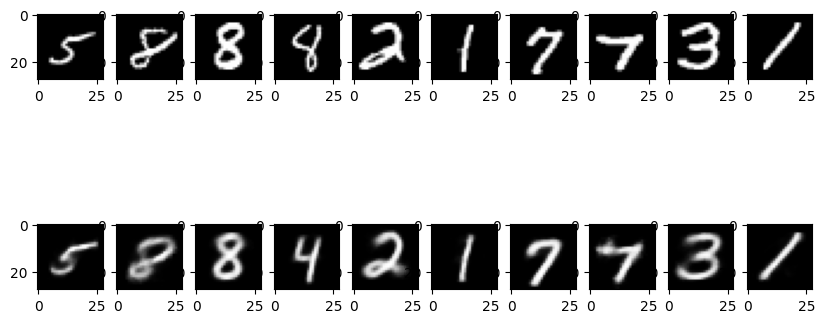

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
    images, _ = next(iter(trainloader))
    images = images.to("cuda")
    outputs = model(images)

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(images[i].reshape(28, 28).detach().cpu(), cmap='gray')
        plt.subplot(2, 10, i + 11)
        plt.imshow(outputs[0][i].reshape(28, 28).detach().cpu(), cmap='gray')
    plt.show()


## GAN с условием (35%)

Воспользуйтесь кодом из семинара и добавьте условия на GAN модели.

1. В качестве условия используйте метки классов.
2. В генератор и дискриминатор добавьте условия на метки классов.

Проверьте качество модели и сравните с остальными моделями. Какую модель вы бы выбрали для работы с генерацией картинок MNIST и почему?

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class Generator(nn.Module):
    def __init__(self, input_dim:int=100, hidden_dim:int=256, output_dim:int=28 * 28):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim * 2, output_dim),
            nn.Tanh(),
        )

    def forward(self, noise):
        return self.main(noise).view(-1, 1, 28, 28)


class Discriminator(nn.Module):
    def __init__(self, input_dim:int=28 * 28, hidden_dim:int=512):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_dim, hidden_dim * 2),
            nn.LeakyReLU(0.2),  # LeakyReLU is common in GANs
            nn.Dropout(0.5),  # Dropout for regularization
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid(),  # Output probability of real/fake
        )

    def forward(self, image:torch.Tensor):
        return self.main(image.view(-1, 28 * 28))  # Flatten input

Epoch [10/200], D_Loss: 0.7308, G_Loss: 1.5052

Epoch [20/200], D_Loss: 0.8992, G_Loss: 3.2735

Epoch [30/200], D_Loss: 0.8326, G_Loss: 2.2380

Epoch [40/200], D_Loss: 0.9813, G_Loss: 1.1887

Epoch [50/200], D_Loss: 1.0990, G_Loss: 1.0996

Epoch [60/200], D_Loss: 1.1985, G_Loss: 1.1657

Epoch [70/200], D_Loss: 1.1959, G_Loss: 0.9029

Epoch [80/200], D_Loss: 1.2335, G_Loss: 0.9627

Epoch [90/200], D_Loss: 1.2301, G_Loss: 0.7704

Epoch [100/200], D_Loss: 1.2372, G_Loss: 0.9484

Epoch [110/200], D_Loss: 1.2305, G_Loss: 0.7912

Epoch [120/200], D_Loss: 1.2527, G_Loss: 0.8796

Epoch [130/200], D_Loss: 1.2492, G_Loss: 0.9815

Epoch [140/200], D_Loss: 1.2758, G_Loss: 0.9235

Epoch [150/200], D_Loss: 1.2643, G_Loss: 0.9456

Epoch [160/200], D_Loss: 1.2453, G_Loss: 0.8573

Epoch [170/200], D_Loss: 1.2727, G_Loss: 0.7754

Epoch [180/200], D_Loss: 1.2578, G_Loss: 0.9130

Epoch [190/200], D_Loss: 1.2570, G_Loss: 1.0313

Epoch [200/200], D_Loss: 1.2926, G_Loss: 0.8955


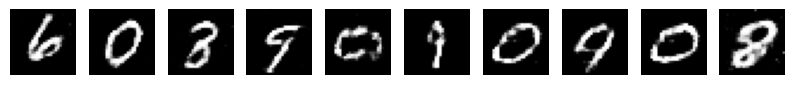

In [ ]:
generator = Generator().to("cuda")
discriminator = Discriminator().to("cuda")
criterion = nn.BCELoss()

# возможно стоит поиграть с гиперпараметрами
optimizer_G = optim.Adam(generator.parameters(), lr=0.0003, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0001, betas=(0.5, 0.999))

EPOCHS = 200
for epoch in range(EPOCHS):
    for real_images, _ in trainloader:
        real_images = real_images.to("cuda")
        batch_size = real_images.size(0)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones(batch_size, 1).to("cuda")
        fake_labels = torch.zeros(batch_size, 1).to("cuda")

        real_output = discriminator(real_images)
        d_loss_real = criterion(real_output, real_labels)
        d_loss_real.backward()

        noise = torch.randn(batch_size, 100).to("cuda")
        fake_images = generator(noise)
        fake_output = discriminator(fake_images.detach())
        d_loss_fake = criterion(fake_output, fake_labels)
        d_loss_fake.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        fake_output = discriminator(fake_images)
        g_loss = criterion(fake_output, real_labels)
        g_loss.backward()
        optimizer_G.step()
    if (epoch + 1) % 10 == 0:
        print(
            f"Epoch [{epoch+1}/{EPOCHS}], D_Loss: {d_loss_real.item() + d_loss_fake.item():.4f}, G_Loss: {g_loss.item():.4f}"
        )

In [ ]:

z = torch.randn(10, 100).to("cuda")
with torch.no_grad():
    fake_images = generator(z).detach().cpu()
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(fake_images[i][0], cmap="gray")
    plt.axis("off")
plt.show()

## Решил ДЗ - дай обратную связь ;)

Надеемся, было интересно и полезно.

Пожалуйста, оставьте обратную связь по этому домашнему заданию: https://forms.gle/iY5NRn9UfaZ344rbA